### Medium
#### How to start creating a stock portfolio using Optimization Algorithms
https://medium.com/@eduardo.garcia.sv/if-you-dont-have-any-idea-how-to-create-a-stock-portfolio-this-will-help-you-99efc92cd4d5


#### Analyzing Alpha
https://analyzingalpha.com/yfinance-python

#### Tools to use

In [1]:
import yfinance as yf # !pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Step 1: Setting up the Variables

In [2]:
benchmark = ['^GSPC',]
portfolio = ['AAPL', 'MSFT', 'TSLA', 'BRK-B', 'SPGI', 'BLK', 'IWDA.L', 'ULVR.L', 'SNOW', 'DTE.DE', 'UGAS.MI', 'EUNL.DE', 'EXXT.DE', 'GOOG', 'AMZN', 'SHOP', 'VOW.DE', 'MC.PA', 'DAX', 'ABNB', 'BX', 'COST', 'JNJ', 'NKE', 'PYPL' , 'QCOM', 'WM']

start_date = '2017-01-01'
end_date = '2022-11-25'
number_of_scenarios = 10_000 # '_' is a useful separator for thousands

returns_vector = []
risk_vector = []
distribution_vector = []

#### Step 2: Downloading and Cleaning the Data

In [3]:
# Get benchmark and portfolio information
dfBenchmark = yf.download(benchmark, start = start_date, end = end_date)
dfPortfolio = yf.download(portfolio, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  27 of 27 completed


In [4]:
# Clean rows with no values in the benchmark and portfolio dataframes
dfBenchmark = dfBenchmark.dropna(axis = 0)
dfPortfolio = dfPortfolio.dropna(axis = 0)

In [5]:
# Matching the days
dfBenchmark = dfBenchmark[dfBenchmark.index.isin(dfPortfolio.index)]

#### Step 3: Analysing the market benchmark

In [6]:
dfBenchmark.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-10,3659.129883,3678.489990,3645.179932,3668.100098,3668.100098,4658480000
2020-12-11,3656.080078,3665.909912,3633.399902,3663.459961,3663.459961,4375470000
2020-12-14,3675.270020,3697.610107,3645.840088,3647.489990,3647.489990,4623850000
2020-12-15,3666.409912,3695.290039,3659.620117,3694.620117,3694.620117,4387080000
2020-12-16,3696.250000,3711.270020,3688.570068,3701.169922,3701.169922,4067040000


In [8]:
# Create benchmark vector from prices at the close
benchmark_vector = np.array(dfBenchmark['Close'])

# Calculate the daily returns of the benchmark
benchmark_vector = np.diff(benchmark_vector) / benchmark_vector[1:]

# Select the final return and risk (?!)
benchmark_return = np.average(benchmark_vector)
benchmark_risk = np.std(benchmark_vector)

# Add the benchmark information into the empty lists created in step 1
returns_vector.append(benchmark_return)
risk_vector.append(benchmark_risk)

#### Step 4: Analysing the portfolio data
Follow the same proceudre as abobe but with two extra steps:
1. Create a loop sequence that will do the exercise 10,000 times
2. Create a random distribution for generating each portfolio and to make it unique

In [9]:
# Analysis of the portfolio
portfolio_vector = np.array(dfPortfolio['Close'])

# Create a loop for the desired number of scenarios:
for i in range(number_of_scenarios):
    # create a random distribution that sums to 1 and that
    # is split by the number of stocks in the portfolio
    random_distribution = np.random.dirichlet(np.ones(len(portfolio)), size = 1)
    distribution_vector.append(random_distribution)
    
    # find the closing price for every day of the portfolio
    portfolio_matmul = np.matmul(random_distribution, portfolio_vector.T)
    
    # calculate the daily returns
    portfolio_matmul = np.diff(portfolio_matmul) / portfolio_matmul[:,1:]
    
    # select the final return and risk
    portfolio_return = np.average(portfolio_matmul, axis = 1)
    portfolio_risk = np.std(portfolio_matmul, axis = 1)
    
    # add the benchmark info to the return and risk vectors (i.e., the lists created in step 1)
    returns_vector.append(portfolio_return[0])
    risk_vector.append(portfolio_risk[0])

#### Step 5: Select the best portfolio from the scenarios
The criterion for the best portfolio is to have the minimum risk, meaning that the stock is at least as volatile as the market. For understanding the risk we’ve being using the Standard Deviation.

And once we have calculated this “minimum risk” we will find the highest return possible. This way we are finding a porfolio that in the past has performed better than the market.

In [10]:
# Create risk boundaries
delta_risk = 0.05
min_risk = np.min(risk_vector)
max_risk = risk_vector[0]*(1 - delta_risk)
risk_gap = [min_risk, max_risk]

# Portfolio return and risk couple
portfolio_array = np.column_stack((returns_vector, risk_vector))[1:,]

# Rule to create the best portfolio
# If the criterion of risk minimum is satisfied then:
if np.where(((portfolio_array[:,1] <= max_risk)))[0].shape[0] > 1:
    min_risk_portfolio = np.where(((portfolio_array[:,1] <= max_risk)))[0]
    best_portfolio_loc = portfolio_array[min_risk_portfolio]
    max_loc = np.argmax(best_portfolio_loc[:,0])
    best_portfolio = best_portfolio_loc[max_loc]
    
# if the criterion of minimum risk is not satisfied then:
else:
    min_risk_portfolio = np.where(((portfolio_array[:,1] ==np.min(risk_vector[1:]))))[0]
    best_portfolio_loc = portfolio_array[min_risk_portfolio]
    max_loc = np.argmax(best_portfolio_loc[:,0])
    best_portfolio = best_portfolio_loc[max_loc]

#### Step 6: Select the best portfolio from the scenarios
We’re going to plot the risk on the x-axis and the return on the y-axis.

In this next image, you can see the market performing (red dot) and then the maximum return at the minimum risk. Meaning that if you would’ve held that portfolio between start and end date, you would’ve had a better portfolio than the market benchmark.

/var/folders/tn/qpcd_fbx3y18d0537n7lmhvm0000gn/T/ipykernel_8992/2181262339.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, -0.25, '-25.00%'),
 Text(0, -0.2, '-20.00%'),
 Text(0, -0.15, '-15.00%'),
 Text(0, -0.09999999999999998, '-10.00%'),
 Text(0, -0.04999999999999999, '-5.00%'),
 Text(0, 0.0, '0.00%'),
 Text(0, 0.050000000000000044, '5.00%'),
 Text(0, 0.10000000000000003, '10.00%'),
 Text(0, 0.15000000000000002, '15.00%')]

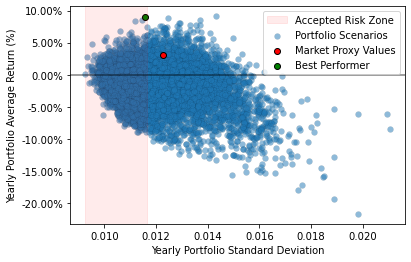

In [11]:
#Visual Representation
trade_days_per_year = 252
risk_gap = np.array(risk_gap) * trade_days_per_year
best_portfolio[0] = np.array(best_portfolio[0]) * trade_days_per_year
x = np.array(risk_vector)
y = np.array(returns_vector) * trade_days_per_year

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, 
           linewidths=0.1,  
           edgecolors='black', 
           label='Portfolio Scenarios'
            )

ax.scatter(x[0], 
           y[0], 
           color='red', 
           linewidths=1,  
           edgecolors='black', 
           label='Market Proxy Values')
 
ax.scatter(best_portfolio[1], 
            best_portfolio[0], 
            color='green', 
            linewidths=1,  
            edgecolors='black', 
            label='Best Performer')

ax.axvspan(min_risk,
           max_risk, 
           color='red', 
           alpha=0.08,
           label='Accepted Risk Zone')

ax.set_ylabel("Yearly Portfolio Average Return (%)")
ax.set_xlabel("Yearly Portfolio Standard Deviation")

ax.axhline(y=0, color='black',alpha=0.5)

ax = plt.gca()
ax.legend(loc=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
# ax.set_xticklabels(['{:,.2%}'.format(x) for x in vals])

In [12]:
#Output Table of Distributions
portfolio_loc = np.where((portfolio_array[:,0] == (best_portfolio[0] / trade_days_per_year)) & (portfolio_array[:,1] == (best_portfolio[1])))[0][0]
best_distribution = distribution_vector[portfolio_loc][0].tolist()
d = {"Stock Name": portfolio, "Stock % in Portfolio": best_distribution}
output = pd.DataFrame(d)
output = output.sort_values(by=["Stock % in Portfolio"], ascending = False)
output= output.style.format({"Stock % in Portfolio": "{:.2%}"})
output

,Stock Name,Stock % in Portfolio
4,SPGI,21.78%
0,AAPL,11.12%
14,AMZN,7.82%
23,NKE,7.62%
15,SHOP,7.22%
26,WM,5.76%
13,GOOG,4.53%
5,BLK,4.30%
9,DTE.DE,4.29%
16,VOW.DE,4.01%
